In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ts = pd.read_csv('TimeseriesMLP.csv')

In [3]:
ts.drop(ts.columns[0],axis=1,inplace=True)

In [4]:
ts

,Attack,Model,Dataset,TrainRegularAccuracy,TrainAdversarialAccuracy,ValRegularAccuracy,ValAdversarialAccuracy
0,L2AdditiveGaussianNoiseAttack_2_2.0,MLP,UCR_FreezerSmallTrain,1.000000,1.000000,0.768772,0.770526
1,L2AdditiveGaussianNoiseAttack_2_2.0,MLP,UCR_GunPoint,0.980000,0.980000,0.833333,0.846667
2,L2AdditiveGaussianNoiseAttack_2_2.0,MLP,UCR_Ham,0.990826,0.990826,0.657143,0.647619
3,L2AdditiveGaussianNoiseAttack_2_0.2,resnet,UCR_BirdChicken,0.700000,0.700000,0.750000,0.750000
4,L2AdditiveGaussianNoiseAttack_2_2.0,MLP,UCR_Herring,0.812500,0.796875,0.671875,0.687500
5,L2AdditiveGaussianNoiseAttack_2_2.0,MLP,UCR_ShapeletSim,1.000000,1.000000,0.522222,0.522222
6,L2AdditiveGaussianNoiseAttack_2_0.2,MLP,UCR_Earthquakes,0.996894,0.996894,0.654676,0.654676
7,L2AdditiveGaussianNoiseAttack_2_2.0,MLP,UCR_TwoLeadECG,1.000000,1.000000,0.851624,0.849868
8,L2AdditiveGaussianNoiseAttack_2_0.2,MLP,UCR_DodgerLoopGame,0.500000,0.500000,0.521739,0.521739
9,L2AdditiveGaussianNoiseAttack_2_2.0,MLP,UCR_Wafer,1.000000,1.000000,0.995782,0.995295


In [5]:
acc_df = []
modes = ["ValRegularAccuracy", "ValAdversarialAccuracy"]

for i, row in ts.iterrows():
    for mode in modes:
        new_row = {}
        new_row["Dataset"] = row["Dataset"]
        new_row["Model"] = row["Model"]
        new_row["Type"] = mode
        new_row["Accuracy"] = row[mode]
        acc_df.append(new_row)
acc_df = pd.DataFrame.from_records(acc_df)

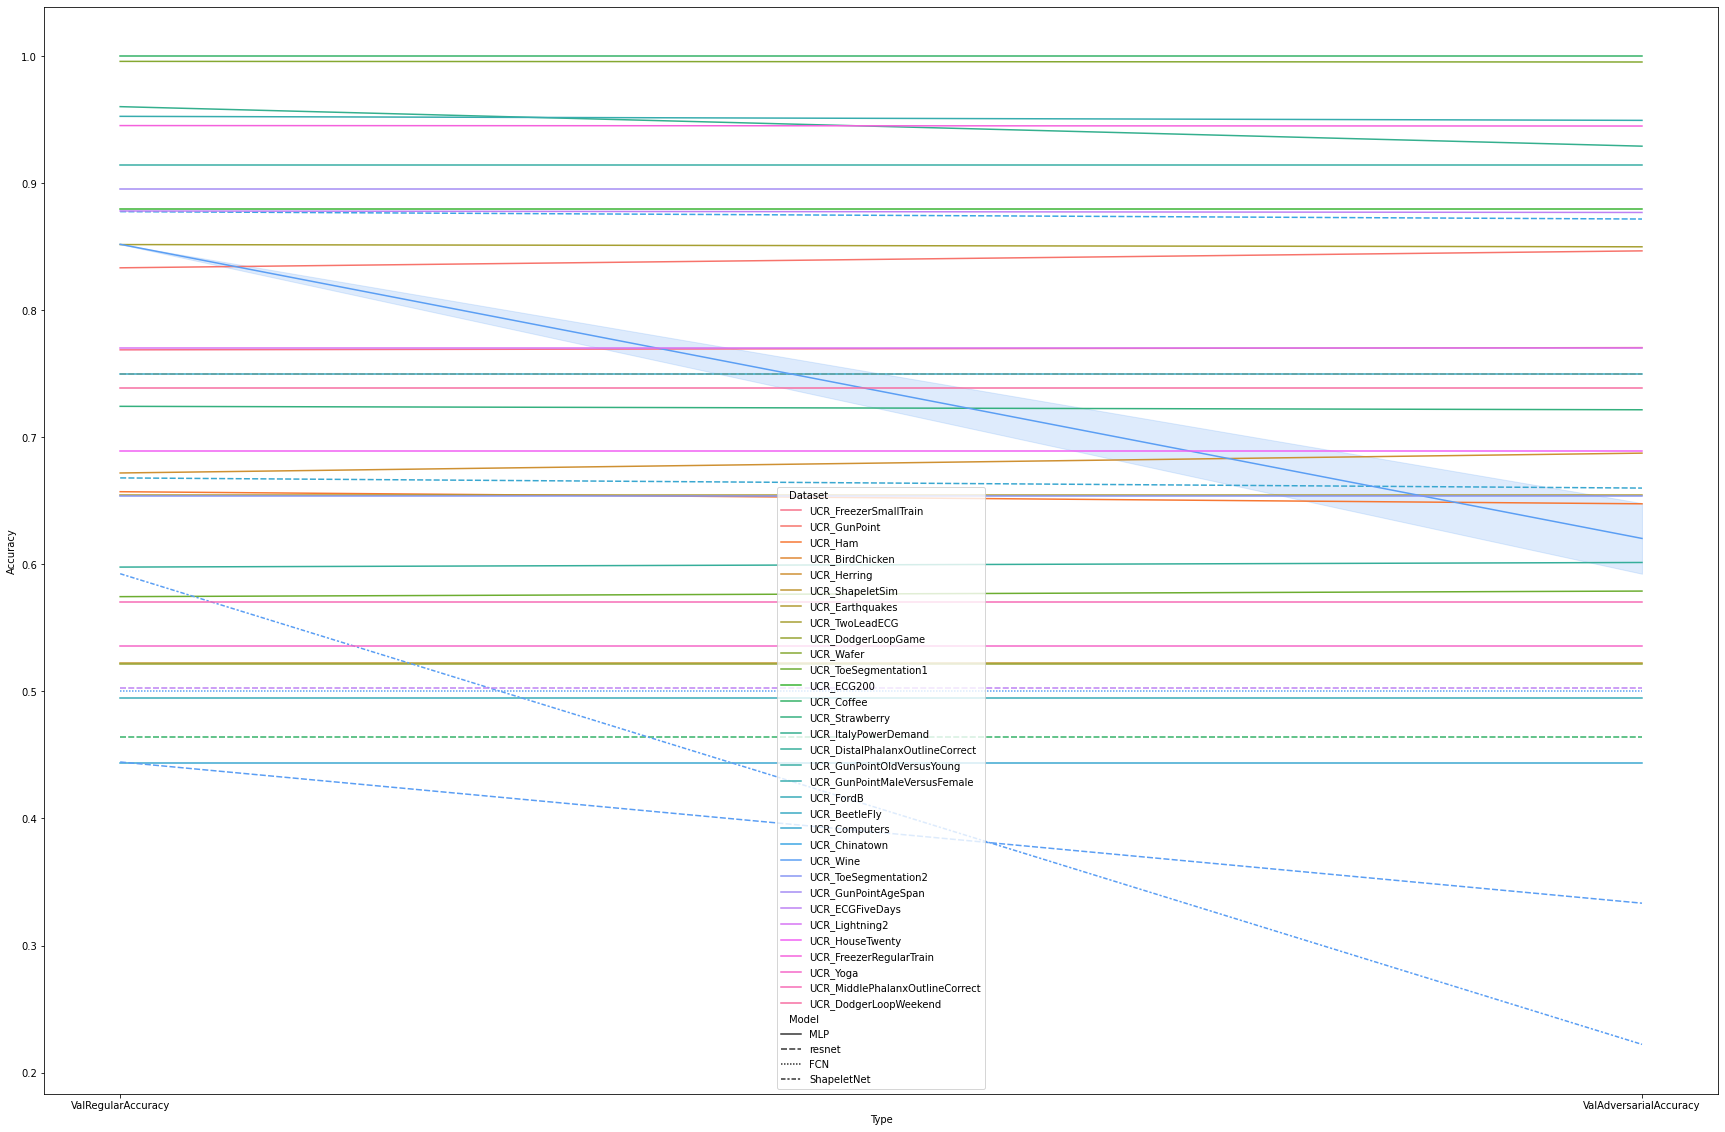

In [6]:
fig, axs = plt.subplots(1,1, figsize=(30,20))
sns.lineplot(x="Type", y="Accuracy", style="Model", hue="Dataset", data=acc_df, sort=False, ax=axs)
fig.savefig("./initial_results.png")

In [8]:
piv = ts.pivot(columns="Model", index="Dataset", values=["ValRegularAccuracy", "ValAdversarialAccuracy"])

ValueError: Index contains duplicate entries, cannot reshape

In [7]:
sns.heatmap(data=piv)

NameError: name 'piv' is not defined